# **Data Handling and Exploration**
---

## Introduction

You will apply different data exploration, cleaning, and visualization techniques. It is very important to take some time to understand the data. 


## **About the data** 
---
The data set consists of 116,658 observations and 10 columns. It contains data of fifth-grade students, including their Math final exam grade.

* Student ID: identifies uniquely every student. **Note that no two students have the same ID.** 
* Gender
* School group: **There are only three groups school groups (A, B and C)**
* Effort regulation (effort)
* Family stress-level (stress)
* Help-seeking behavior (feedback)
* Regularity patterns of a student throughout the course (regularity)
* Critical-thinking skills (critical)
* Duration in minutes to solve final Math exam (minutes). **Should be numerical.**
* Final Math exam grade (grade) 


**The data set is available in the folder data**

In [1]:
import requests

exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)

npt_config = {
    'session_name': 'lab-02',
    'session_owner': 'mlbd',
    'sender_name': input("Your name: "),
}

Your name:  Olivia Perryman


In [2]:
# Your libraries here
# YOUR CODE HERE
import pandas as pd
from pandas.api.types import is_numeric_dtype

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
DATA_DIR = "./../../data"

## **0 Load the data**
---

In [3]:
### 0.1
# YOUR CODE HERE
df = pd.read_csv('{}/school_performance.csv'.format(DATA_DIR))


In [4]:
# Let's see how the dataframe looks like
print("length of the dataframe:", len(df))
print("first rows of the dataframe:\n")
send(len(df), 1) 
df.head()

length of the dataframe: 116658
first rows of the dataframe:



,student_id,gender,school_group,effort,stress,feedback,regularity,critical,minutes,grade
0,20404.0,male,99,5.997184,7.692678,24.722538,99.000000,2.01733,20.0,99.00
1,26683.0,female,99,6.017588,8.848776,99.000000,99.000000,99.00000,30.0,3.93
2,32954.0,99,99,6.070632,6.704850,24.448975,7.218109,99.00000,99,3.67
3,42595.0,99,99,5.996371,99.000000,99.000000,5.578566,1.02639,21.0,99.00
4,28603.0,male,99,99.000000,6.780604,99.000000,99.000000,99.00000,99,2.86


<a id="section1"></a>
## **1 Data Exploration** 
---

As mentioned in class, it is good practice to report the percentage of missing values per feature together with the features' descriptive statistics. 

In order to understand the data better, in this exercise, you should:

1. Create a function that takes as input a DataFrame and returns a DataFrame with meaningful descriptive statistics and the percentage of missing values for numerical and categorical (object type) features. The process of data cleaning requires multiple iterations of data exploration. This function should be helpful for the later data cleaning exercises. 

2. Justify the choice of each descriptive statistic. What does each say about the data? Can you identify some irregularities? 

3. In a single figure, choose an appropriate type of graph for each feature and plot each feature individually.  

4. Explain your observations. How are the features distributed (poisson, exponential, gaussian, etc)? Can you visually identify any outliers?



### 1.1 
Create a function that takes as input a DataFrame and returns meaningful descriptive statistics and the percentage of missing values for numerical and categorical (object type) features.



In [5]:
### 1.1
def get_feature_stats(df):
    """
    Obtains descriptive statistics for all features and percentage of missing 
    values
    
    Parameters
    ----------
    df : DataFrame
         Containing all data

    Returns
    -------
    stats : DataFrame
            Containing the statistics for all features.
    """
    basic_stats = df.describe(include='all')
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    stats = pd.concat([basic_stats, missing_value_df.transpose()])
    
    return stats

In [6]:
# Preprocessing
# replace 99 with None or nan
df = df.replace('99', None)
df = df.replace(99, np.nan)
# Only 3 categories
df['school_group'] = df['school_group'].apply(lambda x: x[0].upper() if x is not None else None)
# minutes should be numeric
df['minutes'] = pd.to_numeric(df['minutes'],errors='coerce')
# student_id should be categorical
df['student_id'] = df['student_id'].astype('string')


stats = get_feature_stats(df)
stats  

,student_id,gender,school_group,effort,stress,feedback,regularity,critical,minutes,grade
count,116656,58329,58329,58329.000000,58329.000000,58329.000000,58329.000000,58329.000000,58315.000000,58329.000000
unique,58328,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20404.0,female,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,29295,25007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.978440,7.572990,15.494115,6.859709,1.330283,36.031947,3.537279
std,NaN,NaN,NaN,0.048722,1.552971,7.330119,2.169821,2.005023,10.153665,0.456478
min,NaN,NaN,NaN,5.641724,4.801122,5.087615,4.824636,-8.115445,15.000000,1.760000
25%,NaN,NaN,NaN,5.951273,6.402041,10.149966,5.732254,0.001135,27.000000,3.310000
50%,NaN,NaN,NaN,5.985351,7.401787,12.843072,6.227957,1.372255,36.000000,3.600000
75%,NaN,NaN,NaN,6.013373,8.688815,18.850751,7.180228,2.719200,45.000000,3.790000


### 1.2
Justify the choice of each descriptive statistic. What do they say about the data? Can you identify some irregularities? 

In [7]:
answer = """
count - number of rows
unique - categorical data: number of unique values, helpful to know how many categories you have (should you encode them? is there the wrong number?)
top - categorical data: most frequent value, helpful to know the mode for categorical data
freq - categorical data: the count for the number of times the value in "top" appears (it is helful to know the frequency of the mode)
mean - numerical data: the average value, it helps to know where the data is centered around, but it is sensitive to outliers
std - numerical data: how spread out the data is around the mean
min/max - numerical data: the minimum and maximum value can show if there are outliers (you can decide if you want to clip the data)
percentiles - numerical data: help with outlier identification and how spread the data is
percent missing - the percentage of nans and None values, tells you how sparse your data is


Irregularities: the unique school groups were not 3, so preprocessing was added, the student ids are not all unique, the minutes contains some strings so preprocessing was added to convert to numeric and remove values with strings
"""

send(answer, 12) 

<Response [200]>

### 1.3
In a single figure, choose an appropriate type of graph for each feature and plot each feature individually.

In [50]:
### 1.3
def plot_features(df):
    """
    Plots all features individually in the same figure
    
    Parameters
    ----------
    df : DataFrame
         Containing all data
         
    Hint
    ------
    To have multiple plots in a single figure see pyplot.figure

    """
    plt.figure(figsize=(8, 40), dpi=80)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

    n_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        if col == "student_id":
            plt.subplot(n_plots, 1, 1+i)
            plt.title(col)
            continue
        if not is_numeric_dtype(df[col]):
            plt.subplot(n_plots, 1, 1+i)
            ax = sns.countplot(x=df[col])
            plt.title(col)
        else:
            plt.subplot(n_plots, 1, 1+i)
            ax = sns.histplot(x=df[col])
            plt.title(col)
            

Datatype not supported


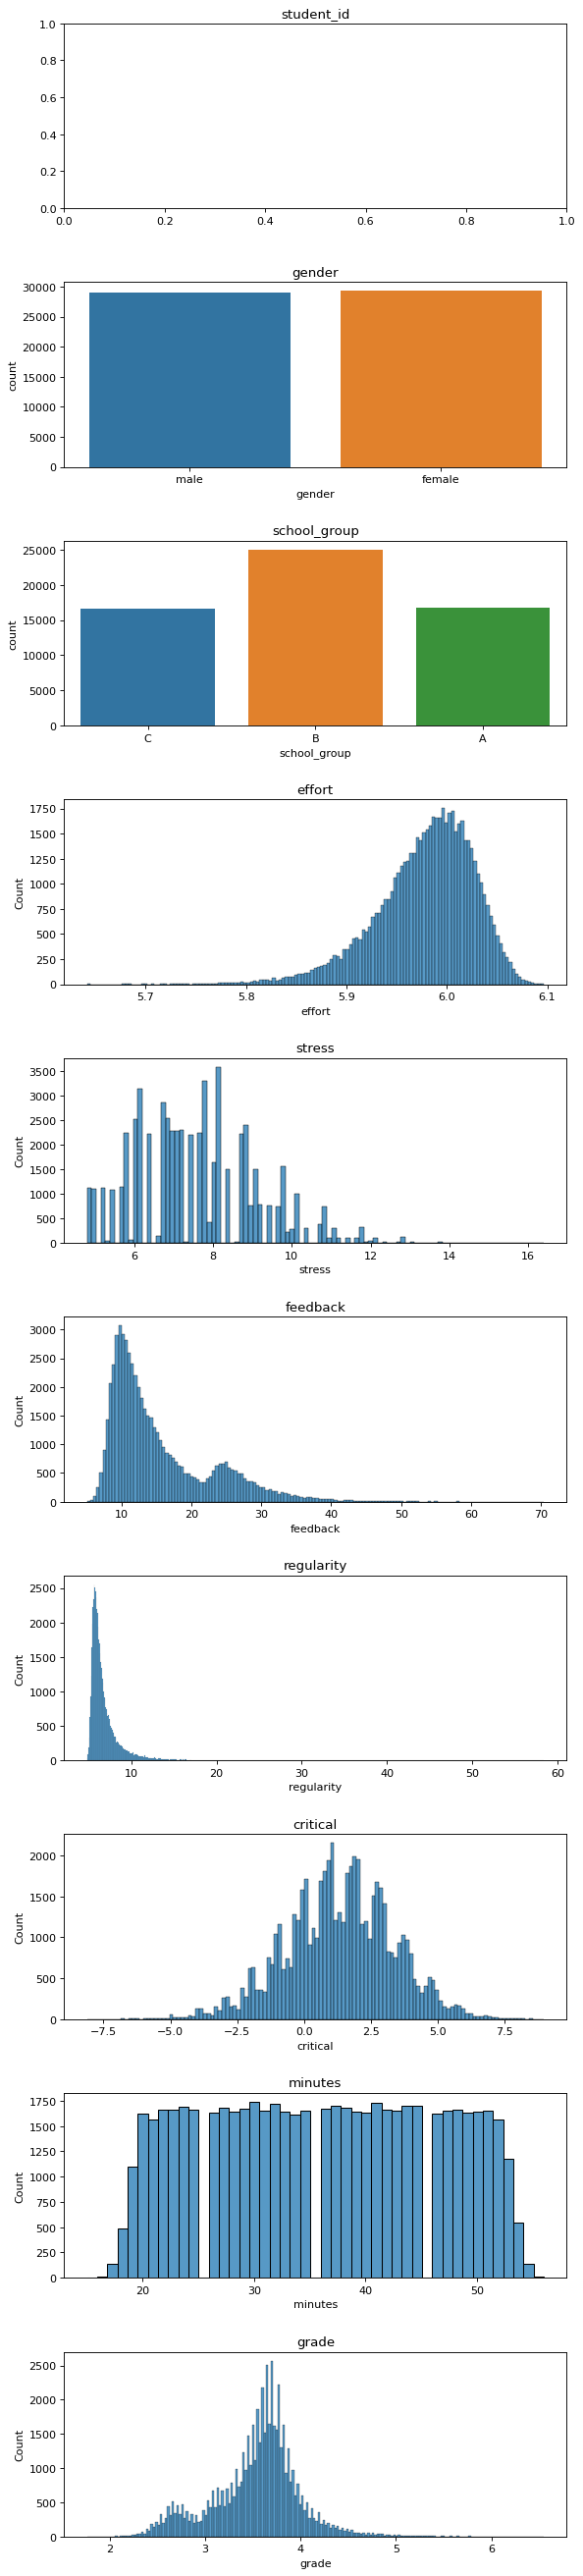

In [52]:
send(plot_features(df),13)

### 1.4
Explain your observations. How are the features distributed (poisson, exponential, gaussian, etc)? Can you visually identify outliers? 

In [53]:
answer = """
student_id - Chose not to plot student_id because it took too long as a bar plot
school_group - not evenly distributed
effort - left skewed, beta
stress - right skewed, poisson
feedback - multimodal
regularity - exponential
critical - normal
minutes - uniform with edges that are normal
grade - kind of multimodal, right skewed, normalish


outliers - yes, some highgrades, high feedback and low effort look like outli
"""

send(answer, 14) 

<Response [200]>

<a id="section2"></a>
## **2 Data Cleaning** 
---

Using your findings from the previous section, carefully continue to explore the data set and do the following:

1. Create a function to handle the missing values
2. Justify your decisions to treat the missing values
3. Create a function to handle the inconsistent data
4. Justify your decisions to treat the inconsistent data


### 2.1
Create a function to handle the missing values

In [ ]:
### 2.1
def handle_missing_values(df):
    """
    Identifies and removes all missing values

    Parameters
    ----------
    df : DataFrame
      Containing missing values

    Returns
    -------
    df : DataFrame
      Without missing values

    Hint:
    -----
    Try to understand the pattern in the missing values    
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return df


In [ ]:
df = handle_missing_values(df)
send(len(df.columns), 21.1)
print("number of columns: ", len(df.columns))

In [ ]:
print("length of the dataframe: ", len(df))
send(len(df), 21.2) 
df.head()

In [ ]:
# take a look at the new dataframe stats and compare it with the original
get_feature_stats(df)

### 2.2 
Justify your decisions to treat the missing values. Are there missing values? If so, how are the missing values encoded? Why are there missing values? Is there a pattern in the values missing?


In [ ]:
answer = """
YOUR ANSWER HERE
"""

send(answer, 22) 

### 2.3 
Create a function to handle the inconsistent data

In [ ]:
### 2.3
def handle_inconsistent_data(df):
    """
    Identifies features with inconsistent data types and transforms features
    to the correct data type (numerical, object). 

    Parameters
    ----------
    df : DataFrame
      Containing inconsistent data

    Returns
    -------
    df : DataFrame
       With consistent data. All columns must be either numerical or categorical

    Hint:
    -----
    Don't forget to convert the features into the correct data type 
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return df

In [ ]:
df = handle_inconsistent_data(df)
print(len(df))
print(df.head())
print(get_feature_stats(df))

### 2.4 
Justify your decisions to treat the inconsistent data. Were there columns with inconsistent data types? How did you identify them? 
 

In [ ]:
answer = """
YOUR ANSWER HERE
"""

send(answer, 24) 

<a id="section3"></a>
## **3 Visualization** 
---

After cleaning the data, we can try to understand or extract insights from it. To do so, in this last section, you will do the following:
1. Create a function to show the relationship between numerical features.
2. Interpret your findings. What is correlation useful for? What insights can you get from it? 
3. Select an appropriate type of graph to explore the relationship between grade, school group, and any other meaningful feature
4. Interpret your findings. What are some factors that seem to influence the grade of the students? Which features do not seem to affect the outcome?


### 3.1 
Create a function to show the linear correlation between features.

In [ ]:
### 3.1
import seaborn as sns
def plot_correlation(df):
    """
    Builds upper triangular heatmap with pearson correlation between numerical variables

    Instructions
    ------------
    The plot must have:
    - An appropiate title
    - Only upper triangular elements
    - Annotated values of correlation coefficients rounded to three significant 
    figures
    - Negative correlation must be blue and possitive correlation red. 

    Parameters
    ----------
    df : DataFrame with data


    """
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
send(plot_correlation(df), 31) 

### 3.2
Interpret your findings. What is correlation useful for? What insights can you get from it? 


In [ ]:
answer = """
YOUR ANSWER HERE
"""

send(answer, 32) 

### 3.3
Select an appropriate type of graph to explore the relationship between grade, school group, and any other meaningful feature.


In [ ]:
### 3.3
def plot_grades(df):
    """
    Visualizes the relationship between grade,  school group and other meaningful
    feature

    Parameters
    ----------
    df : DataFrame with data

    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
send(plot_grades(df), 33)

### 3.4
Interpret your findings. What are some factors that seem to influence the grade of the students? Which features do not seem to affect the outcome?

In [ ]:
answer = """
YOUR ANSWER HERE
"""

send(answer, 34) 